In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices

1. Gather data for nominal price of gas standardize on yearly price
2. Cleaning and transforming
3. adjust prices for inflation
4. graph the nominal and adjusted prices
5. choose some other item with historical prices to compare to gas

In [6]:
t = requests.get("http://localhost/~millbr02/hello.html")
t.text

'<html>\n<head>\n  <link rel="stylesheet" type="text/css" href="hello.css" />\n  \n</head>\n<body>\n<h1>Hello Class</h1>\n<p>This is a paragraph of text that is long and boring so the words will wrap\nsometime.  Not long enough yet, ok add some more and more and more and more.  <br> This is why web designers invented greeking: <a href="http://knuth.luther.edu">Link in paragraph</a> lorem ipsum etc.</p>\n<img src="myimg.jpg">\n<a href="http://knuth.luther.edu">CS Home</a>\n\n<div id="d1">\n<h1 class="c2">List Stuff</h1>\n\n<ul>\n<li>List entry 1</li>\n<li>List entry 2</li>\n</ul>\n</div>\n<p id="clearme"> more stuff after it </p>\n\n</body>\n\n</html>\n'

In [57]:
soup = BeautifulSoup(t.text)

plist = soup.find('table',{'class':'year'})


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [58]:
plist[0].contents[0]

TypeError: 'NoneType' object is not subscriptable

In [59]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text)
print(type(soup))

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


<class 'bs4.BeautifulSoup'>


In [60]:
print(soup.prettify()[0:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="en-us" http-equiv="Content-Language"/>
  <meta content="all" name="robots"/>
  <meta content="EIA - Energy Information Administration" name="agency"/>
  <meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
  <meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
  <link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
  <link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/global/styles/EIA_global.css" media="screen, projecti

In [61]:
from Ipython.display import Image

ImportError: No module named 'Ipython'

In [62]:
print(soup.prettify()[28700:30500])

lid #189BD7;
}
.tpl > tbody tr:first-child {
    border-top: 2px solid #189BD7;
}
.tpl .double-header th[colspan]{
	border-bottom: 1px solid #ccc;
	border-right: 6px solid #fff;
	text-align: left;
}
.tpl th[colspan]{
	border: 1px solid #ccc;
	/*border-right: 6px solid #fff;*/
	text-align: left;
}
sup,sub {height: 0; line-height: 1; vertical-align: baseline; _vertical-align: bottom; position: relative;}
sup {bottom: 1ex;}
sub {top: .5ex;}
/*.tpl th[colspan]:last-child{
	border-right:none;
}*/
.basic_table tr th, .basic_table tr td {
	padding-left: 5px;
	padding-right: 5px;
	font-size: 10px;
}
.tplfooter tr td{font-size:9px;font-style: italic;padding:0px 0px 0px 0px;margin:0px;text-align:left; border: none;}
.tplfooter br {content: ' '}
.tplfooter br:after {content: ' '}
.category_cell button, .value_cell button {
  background-color: transparent;
  border: medium none;
  color: #189BD7;
  cursor: pointer;
  padding: 0px;
  min-height: 20px;
}
.category_cell button:hover, .value_cell butt

# Fomat of our output:

The result will be  dictionary with two keys **year** and **price**
```
{ 'year': [1949, 1950, ...], 'price': [.28, .32, ....])
```

In [63]:
rawdata = {'year':[], 'price':[]}
allrows = soup.find_all("tr")
for row in allrows[4:4+2011-1949+1]:
    el = row.find_all('td')
    year = el[0].contents[0]
    if year < '1990':
        price = el[1].contents[-1]
    else:
        price = el[3].contents[-1]
    try:
        iyear = int(year.strip())
    except:
        iyear = -99
        print("bad data for year", year)
    try:
        fprice = float(price.strip())
    except:
        print("bad data for price", price)
    rawdata['year'].append(iyear)
    rawdata['price'].append(fprice)

In [64]:
rawdata

{'price': [0.268,
  0.268,
  0.272,
  0.274,
  0.287,
  0.29,
  0.291,
  0.299,
  0.31,
  0.304,
  0.305,
  0.311,
  0.308,
  0.306,
  0.304,
  0.304,
  0.312,
  0.321,
  0.332,
  0.337,
  0.348,
  0.357,
  0.364,
  0.361,
  0.388,
  0.532,
  0.567,
  0.59,
  0.622,
  0.627,
  0.857,
  1.191,
  1.311,
  1.222,
  1.158,
  1.129,
  1.115,
  0.857,
  0.897,
  0.9,
  0.997,
  1.164,
  1.14,
  1.127,
  1.108,
  1.112,
  1.147,
  1.231,
  1.234,
  1.059,
  1.165,
  1.51,
  1.461,
  1.358,
  1.591,
  1.88,
  2.295,
  2.589,
  2.801,
  3.266,
  2.35,
  2.788,
  3.527],
 'year': [1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,


In [71]:
df = pd.DataFrame(rawdata)
df.head(10)

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


In [74]:
#df.plot?
df.plot(x='year',y='price',kind='scatter')

In [81]:
#pd.read_excel?
cpi = pd.read_excel('cpi_data.xlsx',skiprows=range(9),header=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [82]:
cols = list(cpi)

In [83]:
cpi[('Jan','Sep')].head()

KeyError: ('Jan', 'Sep')

In [84]:
cpi['YEAR'] = cpi[cols].mean(axis=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN,179.707692
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN,180.238462
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN,181.192308
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN,182.100000
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN,183.492308
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN,185.323077
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN,187.376923
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN,188.992308
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN,190.292308
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN,192.753846


In [85]:
cpi = cpi.set_index(keys='Year')
#cpi[cpi.Year==1966]['YEAR']
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
Year,,,,,,,,,,,,,,,
1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,179.707692
1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,180.238462
1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,181.192308
1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,182.100000
1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,183.492308


In [86]:
cpi.ix[1964]

Jan       30.900000
Feb       30.900000
Mar       30.900000
Apr       30.900000
May       30.900000
Jun       31.000000
Jul       31.100000
Aug       31.000000
Sep       31.100000
Oct       31.100000
Nov       31.200000
Dec       31.200000
HALF1           NaN
HALF2           NaN
YEAR     179.707692
Name: 1964, dtype: float64

In [87]:
nowcpi = 238.78
oldcpi = 31.01

nowcpi/oldcpi * 0.3

2.31002902289584

In [90]:
adj = df.merge(right=cpi,left_on='year', right_index=True)
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,179.707692
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,180.238462
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,181.192308
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,182.100000
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,183.492308


In [89]:
adj['adj_price'] = adj.price * 238.78/adj.YEAR
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR,adj_price
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,179.707692,0.403929
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,180.238462,0.413338
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,181.192308,0.423022
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,182.100000,0.435338
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,183.492308,0.438541


KeyError: 'adj_price'

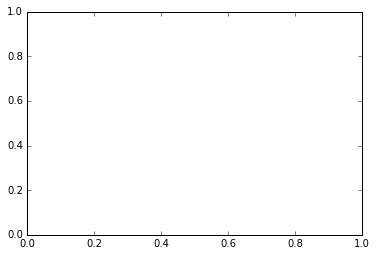

In [95]:
adj.plot(x='year', y='adj_price', kind='scatter')

In [94]:
xx=adj[['price','adj_price']]
xx.index=adj.year
xx.plot()

KeyError: "['adj_price'] not in index"

In [96]:
fig = plt.figure()
ax = figdd_subplot(111)
ax.plot(adj['year'], adj['price'], marker='+', color='b')
ax.plot(adj['year'], adj['adj_price'],marker='^', color='g')
ax.set_ylabel('price in $')
ax.set_xlabel('year')
ax.set_title('Compare Price of Gas')

NameError: name 'figdd_subplot' is not defined

In [97]:
adj.to_excel('testing.xlsx')